In [1]:
suppressMessages(source("../config_sing.R"))

## Helper function

**Negative binomial**

In [2]:
fun_rnegbin = function(n, mu, sigma2){
    theta = mu^2 / (sigma2 - mu)
    x = MASS::rnegbin(n, mu, theta)
    return(x)
}

In [3]:
set.seed(123)
for (n in c(100, 1000, 10000, 100000)){
    x = fun_rnegbin(n, 3, 10)
    print(c(n, mean(x), var(x)))
}

[1] 100.000000   2.600000   7.454545
[1] 1000.000000    2.934000    9.967612
[1] 10000.000000     2.953100     9.716872
[1] 100000.00000      3.01060     10.05281


**Mean-Variance relationship**

In [4]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_input_20x.rds"
fpath = file.path(fdiry, fname)

fit_inp20x = readRDS(fpath)
print(class(fit_inp20x))
print(names(fit_inp20x))
print(length(fit_inp20x$x))

[1] "list"
[1] "x" "y"
[1] 734347


In [5]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_tfx_dmso.rds"
fpath = file.path(fdiry, fname)

fit_dmso = readRDS(fpath)
print(class(fit_dmso))
print(names(fit_dmso))
print(length(fit_dmso$x))

[1] "list"
[1] "x" "y"
[1] 691738


In [6]:
fun_predict = function(fit, x_new){
    y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y
    return(y_new)
}

get_var = function(fit, mu){
    log10mu  = log10(mu)
    log10var = fun_predict(fit, log10mu)
    return(10^log10var)
}

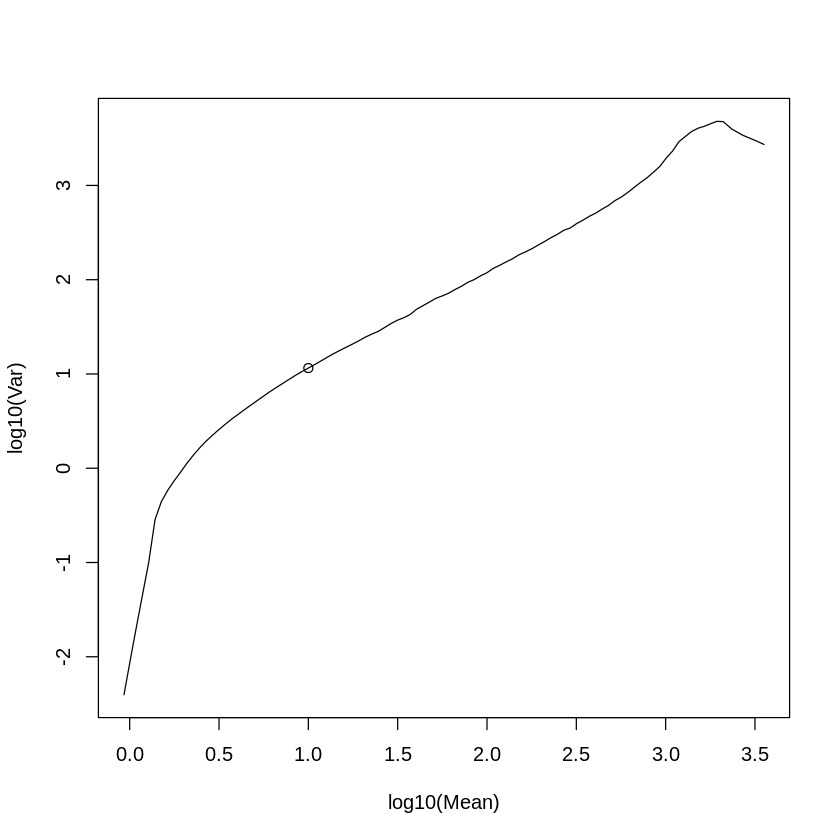

In [10]:
fit = fit_inp20x
x = 1
y = fun_predict(fit, x)

plot(NULL, xlim=range(fit$x), ylim=range(fit$y), ylab="log10(Var)", xlab="log10(Mean)")
lines(fit)
points(x, y)

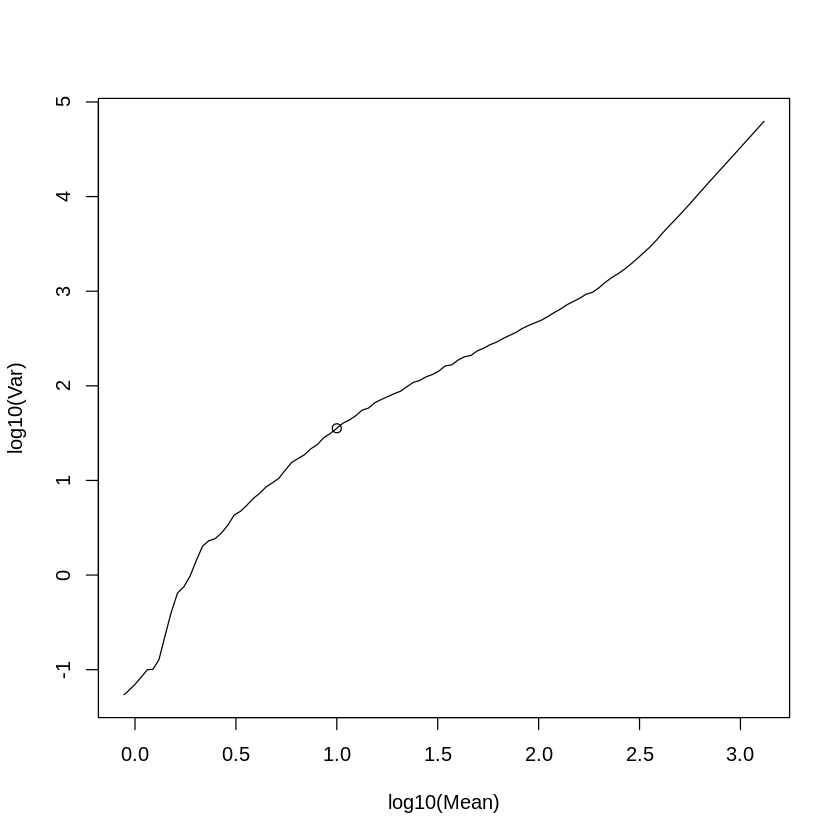

In [11]:
fit = fit_dmso
x = 1
y = fun_predict(fit, x)

plot(NULL, xlim=range(fit$x), ylim=range(fit$y), ylab="log10(Var)", xlab="log10(Mean)")
lines(fit)
points(x, y)

## Import library size

In [12]:
fdiry = file.path(FD_RES, "source")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% 
    group_by(Group) %>% 
    mutate(Size_Group = fun(Size))

###
dat_lib = dat
print(dim(dat))
head(dat)

[1] 54  4


Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input_20x,371718546,363877945
Input1,Input,18666630,19115894
Input2_20x,Input_20x,347635732,363877945
Input2,Input,20167924,19115894
Input3_20x,Input_20x,349994051,363877945
Input3,Input,23280988,19115894


In [13]:
dat = dat_lib
dat = dat %>% dplyr::filter(str_detect(Sample, "_20x|DMSO"))
dat

Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input_20x,371718546,363877945
Input2_20x,Input_20x,347635732,363877945
Input3_20x,Input_20x,349994051,363877945
Input4_20x,Input_20x,413508358,363877945
Input5_20x,Input_20x,341110487,363877945
TFX2_DMSO,TFX_DMSO,43844606,32013519
TFX3_DMSO,TFX_DMSO,26819569,32013519
TFX4_DMSO,TFX_DMSO,30951533,32013519
TFX5_DMSO,TFX_DMSO,28859151,32013519


In [14]:
LIBSIZE_INP20X = 363877945
LIBSIZE_TFX_DMSO   = 32013519

## Import data

In [15]:
###
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "dat_mu_var.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)

###
dat_mu_var = dat
print(dim(dat))
head(dat)

[1] 2911211      10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,69200,70200,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69300,70300,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69400,70400,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69500,70500,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69600,70600,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69700,70700,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA


**`Chr17:8,148,000-8,160,000`**

In [24]:
###
loc1 = 8148000 - 10 * 1000
loc2 = 8160000 + 10 * 1000

###
dat = dat_mu_var
dat = dat %>% dplyr::filter(Start >= loc1, End <= loc2)

###
dat_mu_var_per1 = dat
print(dim(dat))
head(dat)

[1] 1244   10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8138000,8139000,Input,1.4473826,0.01070596,0.10346962,27.66801,3.912145,1.977914
chr17,8138000,8139000,Input_20x,1.3755739,0.00414966,0.06441785,500.54100,549.444692,23.440237
chr17,8138000,8139000,TFX_Dex,0.7009702,0.09660907,0.31082000,25.51226,127.972507,11.312493
chr17,8138000,8139000,TFX_DMSO,0.7286551,0.03514975,0.18748268,23.32681,36.023768,6.001980
chr17,8138100,8139100,Input,1.5451034,0.02251009,0.15003363,29.53603,8.225579,2.868027
chr17,8138100,8139100,Input_20x,1.4730734,0.01163226,0.10785297,536.01892,1540.194950,39.245318


In [25]:
dat_inp  = dat_mu_var_per1 %>% dplyr::filter(Group == "Input_20x")
dat_dmso = dat_mu_var_per1 %>% dplyr::filter(Group == "TFX_DMSO")

x = dat_inp$Cpm_Mean * LIBSIZE_TFX_DMSO / 10^6

print(range(dat_inp$Cnt_Mean))
print(range(dat_dmso$Cnt_Mean))
print(range(x))

[1]   63.07841 1298.65852
[1]   4.542899 247.503880
[1]   5.549559 114.254325


In [26]:
head(dat_inp)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8138000,8139000,Input_20x,1.375574,0.004149660,0.06441785,500.5410,549.4447,23.44024
chr17,8138100,8139100,Input_20x,1.473073,0.011632263,0.10785297,536.0189,1540.1950,39.24532
chr17,8138200,8139200,Input_20x,1.532970,0.010188587,0.10093853,557.8141,1349.0419,36.72931
chr17,8138300,8139300,Input_20x,1.599317,0.011307650,0.10633744,581.9561,1497.2139,38.69385
chr17,8138400,8139400,Input_20x,1.625812,0.010077895,0.10038872,591.5970,1334.3855,36.52924
chr17,8138500,8139500,Input_20x,1.738669,0.008593347,0.09270030,632.6633,1137.8206,33.73160


In [27]:
head(dat_dmso)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8138000,8139000,TFX_DMSO,0.7286551,0.03514975,0.1874827,23.32681,36.02377,6.001980
chr17,8138100,8139100,TFX_DMSO,0.7286551,0.03514975,0.1874827,23.32681,36.02377,6.001980
chr17,8138200,8139200,TFX_DMSO,0.7286551,0.03514975,0.1874827,23.32681,36.02377,6.001980
chr17,8138300,8139300,TFX_DMSO,0.7395139,0.02389650,0.1545849,23.67444,24.49070,4.948808
chr17,8138400,8139400,TFX_DMSO,0.6664787,0.01961804,0.1400644,21.33633,20.10585,4.483955
chr17,8138500,8139500,TFX_DMSO,0.7103048,0.02279447,0.1509784,22.73936,23.36127,4.833349


## simulation

**Test**

In [28]:
set.seed(123)
mat  = replicate(1000, fun_rnegbin(n=rep(1, 10), mu=1:10, sigma2=11:20))
mu   = round(apply(mat, 1, mean), 2) 
sig2 = round(apply(mat, 1, var), 2)

print(dim(mat))
print(mu)
print(sig2)

[1]   10 1000
 [1]  0.88  1.89  3.01  3.92  4.86  5.90  7.05  8.00  9.00 10.05
 [1] 10.81  9.32 13.77 14.60 13.17 14.65 16.18 19.68 18.84 19.90


**Simulate**

In [29]:
dat = dat_inp
head(dat)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8138000,8139000,Input_20x,1.375574,0.004149660,0.06441785,500.5410,549.4447,23.44024
chr17,8138100,8139100,Input_20x,1.473073,0.011632263,0.10785297,536.0189,1540.1950,39.24532
chr17,8138200,8139200,Input_20x,1.532970,0.010188587,0.10093853,557.8141,1349.0419,36.72931
chr17,8138300,8139300,Input_20x,1.599317,0.011307650,0.10633744,581.9561,1497.2139,38.69385
chr17,8138400,8139400,Input_20x,1.625812,0.010077895,0.10038872,591.5970,1334.3855,36.52924
chr17,8138500,8139500,Input_20x,1.738669,0.008593347,0.09270030,632.6633,1137.8206,33.73160


In [37]:
dat = dat_inp
dat = dat %>% dplyr::select(Chrom, Start, End, Cpm_Mean)

dat = dat %>% mutate(
    Cnt_Inp20x   = Cpm_Mean * LIBSIZE_INP20X   / 10^6,
    Cnt_TFX_DMSO = Cpm_Mean * LIBSIZE_TFX_DMSO / 10^6)
dat  = dat %>% mutate(
    Sig2_Inp20x   = get_var(fit_inp20x, Cnt_Inp20x),
    Sig2_TFX_DMSO = get_var(fit_dmso,   Cnt_TFX_DMSO)
)

dat_sum = dat
print(dim(dat))
print(range(dat$Sig2_Inp20x))
print(range(dat$Sig2_TFX_DMSO))
head(dat)

[1] 311   8
[1]   74.55542 3346.63355
[1]  12.82527 560.50571


Chrom,Start,End,Cpm_Mean,Cnt_Inp20x,Cnt_TFX_DMSO,Sig2_Inp20x,Sig2_TFX_DMSO
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8138000,8139000,1.375574,500.5410,44.03696,653.6318,204.9428
chr17,8138100,8139100,1.473073,536.0189,47.15826,712.5459,216.2050
chr17,8138200,8139200,1.532970,557.8141,49.07577,742.9706,229.8202
chr17,8138300,8139300,1.599317,581.9561,51.19975,783.6945,240.4502
chr17,8138400,8139400,1.625812,591.5970,52.04795,801.3460,243.9781
chr17,8138500,8139500,1.738669,632.6633,55.66091,881.9160,262.0707


In [38]:
dat  = dat_sum
tmp  = dat %>% dplyr::select(Chrom, Start, End)
mu   = dat$Cnt_Inp20x
sig2 = dat$Sig2_Inp20x

set.seed(123)
n    = 10
mat  = replicate(n, fun_rnegbin(n=rep(1, length(mu)), mu=mu, sigma2=sig2))
colnames(mat) = paste0("Cnt_Sim_", 1:n)

dat_sim_inp  = bind_cols(tmp, mat)
print(dim(dat_sim_inp))
head(dat_sim_inp)

[1] 311  13


Chrom,Start,End,Cnt_Sim_1,Cnt_Sim_2,Cnt_Sim_3,Cnt_Sim_4,Cnt_Sim_5,Cnt_Sim_6,Cnt_Sim_7,Cnt_Sim_8,Cnt_Sim_9,Cnt_Sim_10
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr17,8138000,8139000,492,529,512,526,571,459,473,496,447,482
chr17,8138100,8139100,546,522,560,569,516,563,525,558,546,553
chr17,8138200,8139200,526,506,568,567,583,569,566,525,560,578
chr17,8138300,8139300,575,578,594,609,598,577,566,592,576,635
chr17,8138400,8139400,600,577,548,618,538,589,566,553,562,569
chr17,8138500,8139500,638,632,613,625,623,637,696,622,638,663


In [32]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp", "simulation")
fname = "dat_sim_input_20x.tsv"
fpath = file.path(fdiry, fname)

dat = dat_sim_inp
write_tsv(dat, fpath)

In [34]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp", "simulation")
fname = "dat_sim_input_20x.bed"
fpath = file.path(fdiry, fname)

dat = dat_sim_inp
write_tsv(dat, fpath, col_names = FALSE)

In [43]:
dat  = dat_sum
tmp  = dat %>% dplyr::select(Chrom, Start, End)
mu   = dat$Cnt_TFX_DMSO
sig2 = dat$Sig2_TFX_DMSO

set.seed(123)
n    = 10
mat  = replicate(n, fun_rnegbin(n=rep(1, length(mu)), mu=mu, sigma2=sig2))
colnames(mat) = paste0("Cnt_Sim_", 1:n)

dat_sim_dmso  = bind_cols(tmp, mat)
print(dim(dat_sim_dmso))
head(dat_sim_dmso)

[1] 311  13


Chrom,Start,End,Cnt_Sim_1,Cnt_Sim_2,Cnt_Sim_3,Cnt_Sim_4,Cnt_Sim_5,Cnt_Sim_6,Cnt_Sim_7,Cnt_Sim_8,Cnt_Sim_9,Cnt_Sim_10
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr17,8138000,8139000,31,45,46,67,50,37,44,66,26,32
chr17,8138100,8139100,52,44,38,51,41,42,71,34,60,15
chr17,8138200,8139200,37,56,56,29,95,69,37,53,36,60
chr17,8138300,8139300,50,58,46,44,57,59,60,70,67,29
chr17,8138400,8139400,80,62,79,79,26,55,64,42,45,61
chr17,8138500,8139500,64,28,94,43,52,55,65,70,46,47


In [44]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp", "simulation")
fname = "dat_sim_dmso.tsv"
fpath = file.path(fdiry, fname)

dat = dat_sim_dmso
write_tsv(dat, fpath)

In [45]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp", "simulation")
fname = "dat_sim_dmso.bed"
fpath = file.path(fdiry, fname)

dat = dat_sim_dmso
write_tsv(dat, fpath, col_names = FALSE)